<a href="https://colab.research.google.com/github/Stereo-Alex/Frutavision/blob/main/Workbook_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d chrisfilo/fruit-recognition

100% 7.92G/7.92G [03:03<00:00, 73.2MB/s]
100% 7.92G/7.92G [03:03<00:00, 46.4MB/s]


In [ ]:
!unzip fruit-recognition.zip

In [4]:
#!7z x fruit-recognition.zip



7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 8501391916 bytes (8108 MiB)

Extracting archive: fruit-recognition.zip
  5% 4096 Open              --
Path = fruit-recognition.zip
Type = zip
Physical Size = 8501391916
64-bit = +

  0%    
Would you like to replace the existing file:
  Path:     ./Apple/Apple A/Apple 1.png
  Size:     232182 bytes (227 KiB)
  Modified: 2020-02-04 18:56:50
with the file from archive:
  Path:     Apple/Apple A/Apple 1.png
  Size:     232182 bytes (227 KiB)
  Modified: 2020-02-04 18:56:50
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? Q

Archives with Errors: 1



Break signaled


# Creating a df with the paths

In [1]:
import pandas as pd
import numpy as np
import os 
import cv2
import matplotlib.pyplot as plt

In [2]:
#os.listdir(path)
apple_path = '/content/Apple'
banana_path = '/content/Banana'
carambola_path = '/content/Carambola'
guava_path = '/content/Guava'
kiwi_path = '/content/Kiwi'
mango_path = '/content/Mango'
muskmelon_path = '/content/muskmelon'
orange_path = '/content/Orange'
peach_path =  '/content/Peach'
pear_path = '/content/Pear'
persimmon_path = '/content/Persimmon'
pitaya_path = '/content/Pitaya'
plum_path = '/content/Plum'
pomegranate_path = '/content/Pomegranate'
tomatoes_path = '/content/Tomatoes'


In [3]:
list_of_paths = [apple_path, banana_path, carambola_path, guava_path,
                kiwi_path, mango_path, muskmelon_path, orange_path,
                peach_path, pear_path, persimmon_path, pitaya_path,
                plum_path, pomegranate_path, tomatoes_path]

In [4]:
list_of_paths[0]

'/content/Apple'

In [5]:
def data_frame_gen(list_of_paths):
    all_files = []
    for path in list_of_paths:
        
        for dirpath, _, filenames in os.walk(path):
            for fn in filenames:
                all_files.append(os.path.join(dirpath, fn))
    
    img_df = pd.DataFrame({'Path': all_files})
    
    img_df['Fruit'] = img_df['Path'].apply(lambda p: p.split(os.sep)[2])
    img_df = img_df[['Fruit', 'Path']]            
    
    return img_df


In [6]:
df = data_frame_gen(list_of_paths)

In [7]:
df

,Fruit,Path
0,Apple,/content/Apple/Total Number of Apples/Apple 03...
1,Apple,/content/Apple/Total Number of Apples/Apple 01...
2,Apple,/content/Apple/Total Number of Apples/Apple_0_...
3,Apple,/content/Apple/Total Number of Apples/Apple 01...
4,Apple,/content/Apple/Total Number of Apples/Apple 01...
...,...,...
70544,Tomatoes,/content/Tomatoes/Tamotoes001882.png
70545,Tomatoes,/content/Tomatoes/Tamotoes001889.png
70546,Tomatoes,/content/Tomatoes/Tamotoes001141.png
70547,Tomatoes,/content/Tomatoes/Tamotoes00775.png


In [8]:
df.groupby('Fruit').count()


,Path
Fruit,
Apple,11185
Banana,3027
Carambola,2080
Guava,19698
Kiwi,8465
Mango,4154
Orange,3012
Peach,2629
Pear,3012


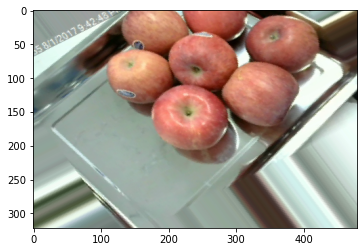

In [9]:
img = cv2.imread(df['Path'][1], cv2.COLOR_BGR2RGB)
img_GRB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_GRB)
#print(img_GRB)
plt.show()

In [10]:
df.shape

(70549, 2)

In [11]:
df

,Fruit,Path
0,Apple,/content/Apple/Total Number of Apples/Apple 03...
1,Apple,/content/Apple/Total Number of Apples/Apple 01...
2,Apple,/content/Apple/Total Number of Apples/Apple_0_...
3,Apple,/content/Apple/Total Number of Apples/Apple 01...
4,Apple,/content/Apple/Total Number of Apples/Apple 01...
...,...,...
70544,Tomatoes,/content/Tomatoes/Tamotoes001882.png
70545,Tomatoes,/content/Tomatoes/Tamotoes001889.png
70546,Tomatoes,/content/Tomatoes/Tamotoes001141.png
70547,Tomatoes,/content/Tomatoes/Tamotoes00775.png


In [12]:
## Removing DS_store

for path in df.Path:
    count_to_drop = 0 
    if 'DS_Store'in str(path):
        df = df.drop(df.index[count_to_drop])
    count_to_drop = count_to_drop + 1
        

In [13]:
df

,Fruit,Path
0,Apple,/content/Apple/Total Number of Apples/Apple 03...
1,Apple,/content/Apple/Total Number of Apples/Apple 01...
2,Apple,/content/Apple/Total Number of Apples/Apple_0_...
3,Apple,/content/Apple/Total Number of Apples/Apple 01...
4,Apple,/content/Apple/Total Number of Apples/Apple 01...
...,...,...
70544,Tomatoes,/content/Tomatoes/Tamotoes001882.png
70545,Tomatoes,/content/Tomatoes/Tamotoes001889.png
70546,Tomatoes,/content/Tomatoes/Tamotoes001141.png
70547,Tomatoes,/content/Tomatoes/Tamotoes00775.png


## Preping the data 

In [14]:
# Shuffling data

from sklearn.utils import shuffle

df = shuffle(df, random_state = 0)

df = df.reset_index(drop=True)

df

,Fruit,Path
0,Apple,/content/Apple/Total Number of Apples/Apple 02...
1,Apple,/content/Apple/Total Number of Apples/Apple 01...
2,Kiwi,/content/Kiwi/Kiwi C/Kiwi C00977.png
3,Pomegranate,/content/Pomegranate/Pomegranet001637.png
4,Guava,/content/Guava/guava A/scene07181.png
...,...,...
70544,Guava,/content/Guava/Guava total/1GuavaуАВ3126 resiz...
70545,Mango,/content/Mango/Mango002659.png
70546,Kiwi,/content/Kiwi/Kiwi C/Kiwi C0095.png
70547,Kiwi,/content/Kiwi/Kiwi B/Kiwi B00943.png


In [15]:
# adding a label to the data 

fruit_names = sorted(df.Fruit.unique())
mapper_fruit_names = dict(zip(fruit_names, [t for t in range(len(fruit_names))]))
df["label"] = df["Fruit"].map(mapper_fruit_names)
print(mapper_fruit_names)

# Visualize the resulting dataframe
df.head()

{'Apple': 0, 'Banana': 1, 'Carambola': 2, 'Guava': 3, 'Kiwi': 4, 'Mango': 5, 'Orange': 6, 'Peach': 7, 'Pear': 8, 'Persimmon': 9, 'Pitaya': 10, 'Plum': 11, 'Pomegranate': 12, 'Tomatoes': 13, 'muskmelon': 14}


,Fruit,Path,label
0,Apple,/content/Apple/Total Number of Apples/Apple 02...,0
1,Apple,/content/Apple/Total Number of Apples/Apple 01...,0
2,Kiwi,/content/Kiwi/Kiwi C/Kiwi C00977.png,4
3,Pomegranate,/content/Pomegranate/Pomegranet001637.png,12
4,Guava,/content/Guava/guava A/scene07181.png,3


# Preping to model

In [16]:
# Reshaping the image

In [17]:
def load_img(df):
# Load the images using their contained in the dataframe df
# Return a list of images and a list with the labels of the images
    img_paths = df["Path"].values
    img_labels = df["Fruit"].values
    X = []
    y = []
    
    for i,path in enumerate(img_paths):
        img =  cv2.imread(path)
        img = cv2.resize(img, (150,150))
        label = img_labels[i]
        X.append(img)
        y.append(label)
    return np.array(X),np.array(y)




In [18]:
X, y = load_img(df)

In [19]:
y.shape

(70549,)

In [20]:
length = len(mapper_fruit_names)
length

15

In [21]:
y

array(['Apple', 'Apple', 'Kiwi', ..., 'Kiwi', 'Kiwi', 'Pomegranate'],
      dtype='<U11')

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = le.fit_transform(y)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



In [24]:
X_train.shape

(63494, 150, 150, 3)

In [25]:
shape_img = (150,150,3)

In [26]:
import tensorflow as tf
from tensorflow.keras import layers
  
model =  tf.keras.models.Sequential([

        tf.keras.layers.Conv2D(32 ,(3,3), activation = 'relu', input_shape = shape_img, padding = 'same'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64 ,(3,3), activation = 'relu',padding = 'same'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64 ,(3,3), activation = 'relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64 ,(3,3), activation = 'relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64 ,(3,3), activation = 'relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(32 ,(3,3), activation = 'relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(15, activation = 'softmax')

                                     
])



model.summary()

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        3

In [27]:
df

,Fruit,Path,label
0,Apple,/content/Apple/Total Number of Apples/Apple 02...,0
1,Apple,/content/Apple/Total Number of Apples/Apple 01...,0
2,Kiwi,/content/Kiwi/Kiwi C/Kiwi C00977.png,4
3,Pomegranate,/content/Pomegranate/Pomegranet001637.png,12
4,Guava,/content/Guava/guava A/scene07181.png,3
...,...,...,...
70544,Guava,/content/Guava/Guava total/1GuavaуАВ3126 resiz...,3
70545,Mango,/content/Mango/Mango002659.png,5
70546,Kiwi,/content/Kiwi/Kiwi C/Kiwi C0095.png,4
70547,Kiwi,/content/Kiwi/Kiwi B/Kiwi B00943.png,4


In [28]:
X_train.shape

(63494, 150, 150, 3)

In [29]:
y_train.shape


(63494,)

In [ ]:
history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test),
                    epochs=5,
                    batch_size = 128 )


Epoch 1/5
497/497 [==============================] - 53s 102ms/step - loss: 0.0485 - accuracy: 0.9820 - val_loss: 0.0450 - val_accuracy: 0.9830
Epoch 2/5
497/497 [==============================] - 50s 101ms/step - loss: 0.0298 - accuracy: 0.9888 - val_loss: 0.0595 - val_accuracy: 0.9809
Epoch 3/5
253/497 [==============>...............] - ETA: 1:00 - loss: 0.0243 - accuracy: 0.9909

In [31]:
acc = []
val_acc = []
for i in range(len(history)):
    acc += history[i]["accuracy"]
    val_acc += history[i]["val_accuracy"]
    
hist_df = pd.DataFrame({"# Epoch": [e for e in range(1,len(acc)+1)],"Accuracy": acc, "Val_accuracy": val_acc})
hist_df.plot(x = "# Epoch", y = ["Accuracy","Val_accuracy"])
plt.title("Accuracy vs Validation Accuracy")
plt.show()


NameError: ignored